<a href="https://colab.research.google.com/github/YuukiHnf/GaussianProcess/blob/main/GridbyGPythorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install GPyTorch

     |████████████████████████████████| 286kB 14.1MB/s 
  Created wheel for GPyTorch: filename=gpytorch-1.3.0-py2.py3-none-any.whl size=473796 sha256=cb5c0f622ee9a6b5f28990745321ee1d3aa62423f389f2f4f1ade7b106850b39
  Stored in directory: /root/.cache/pip/wheels/4c/b2/5d/79ddf695f614490bde2d65f28b7a170ddd1cea74ac3c2bf807
Successfully built GPyTorch


In [ ]:
import torch
import math 
import gpytorch
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
x1 = np.linspace(-2,2,120).reshape(-1,1)
x2 = np.linspace(-3,3,130).reshape(-1,1)
x1, x2 = np.meshgrid(x1,x2)
y = np.sin(x1*np.pi) + x2 + 0.01*np.random.multivariate_normal(np.zeros(shape=(120)),np.eye(120),size=(130))

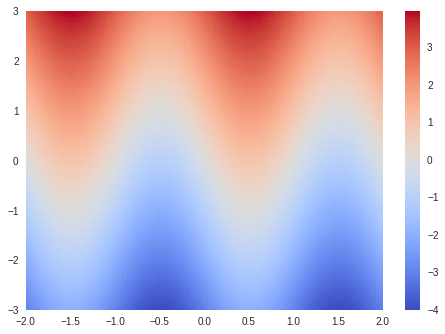

In [ ]:
import matplotlib.cm as cm
plt.style.use('seaborn')
plt.pcolor(x1,x2,y, cmap=cm.coolwarm)
plt.colorbar()

In [ ]:
X = np.hstack([x1.ravel().reshape(-1,1), x2.ravel().reshape(-1,1)]).reshape(-1,2)
Y = y.ravel().reshape(-1,1)

In [ ]:
class GridGPRegressionModel(gpytorch.models.ExactGP):
  def __init__(self,grid ,train_x, train_y, likelihood):
    super(GridGPRegressionModel, self).__init__(train_x, train_y, likelihood)
    self.mean_module = gpytorch.means.ConstantMean()
    self.covar_module = gpytorch.kernels.GridKernel(gpytorch.kernels.RBFKernel(), grid=grid)

  def forward(self, x):
    mean_x = self.mean_module(x)
    covar_x = self.covar_module(x)
    return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)
  

NameError: ignored

In [ ]:
likelihood = gpytorch.likelihoods.GaussianLikelihood()
model = GridGPRegressionModel(grid, train_x, train_y, likelihood)